In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
681,682,1,1,"Hassab, Mr. Hammad",male,27.0,0,0,PC 17572,76.7292,D49,C
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S


In [4]:
df[df['SibSp'] > 0].sample(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5,B69,S


In [5]:
train_data = df[['Survived','Pclass','Sex']]

In [6]:
train_data.sample(n=3)

,Survived,Pclass,Sex
472,1,2,female
788,1,3,male
822,0,1,male


In [7]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
train_data.sample(n=3)

,Survived,Pclass,Sex
890,0,3,0
553,1,3,0
199,0,2,1


In [9]:
train_data.sample(n=3).as_matrix()

array([[0, 1, 0],
       [1, 1, 1],
       [0, 3, 0]], dtype=int64)

In [10]:
%matplotlib inline

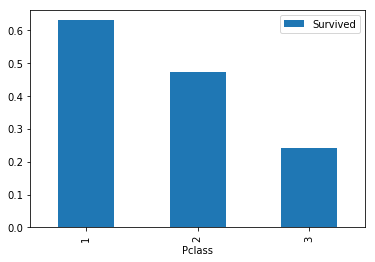

In [11]:
train_data[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
df['Embarked'].mode().iloc[0]

'S'

In [15]:
df.Embarked.fillna(str(df['Embarked'].mode().iloc[0]),inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
df.Embarked[61]

'S'

In [18]:
df[['Embarked','Survived']].groupby('Embarked').count()

,Survived
Embarked,
C,168
Q,77
S,646


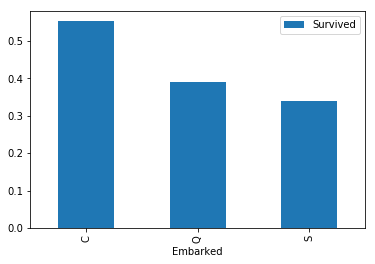

In [19]:
df[['Embarked','Survived']].groupby('Embarked').mean().plot.bar()

In [20]:
df[df['Age']<16][['Age','Survived']].mean()

Age         6.369518
Survived    0.590361
dtype: float64

In [22]:
df[df['Age']>=16][['Age','Survived']].mean()

Age         32.767829
Survived     0.381933
dtype: float64